<h1 style="text-align:center">House Prices : Advanced Regression Techniques</h3>

<h3 style="text-align:center">Load Libraries</h3>

In [1]:
import numpy as np
import pandas as pd 

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



# plot feature importance
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel


C:\Users\Melan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h3 style="text-align:center">Load Dataset</h3>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [3]:
# Shape
print("Train_df shape:", train_df.shape ) 
print("Test_df shape:", test_df.shape )

Train_df shape: (1460, 81)
Test_df shape: (1459, 80)


In [4]:
# Peek at the first 5 rows of the data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Peek at the last 5 rows of the data
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Check type of each column
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
# Summarize all the missing values in each column in the train set
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
# Description of the columns
train_df.drop('Id', axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Select all the columns with missing values
# train_df.columns[train_df.isnull().any()]

missTrain_df = train_df.copy()
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
print("Column missing in training set:", missTrain_df.shape[1])

missTest_df = test_df.copy()
missTest_df = missTest_df.loc[:, missTest_df.isnull().any()]
print("Column with missing values in test set:", missTest_df.shape[1])


Column missing in training set: 19
Column with missing values in test set: 33


In [10]:
missTrain_df.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [11]:
missTrain_df.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
missTest_df.isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

<h3 style="text-align:center">Feature Engineering</h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<u>We drop the columns with too many missing values</u>

In [5]:
def drop_columns(dataset):
    """Drop columns with too many missing values"""
    dataset.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
    
drop_columns(missTrain_df)
drop_columns(missTest_df)

In [15]:
missTrain_df.shape

(1460, 15)

In [6]:
drop_columns(train_df)
drop_columns(test_df)
print(train_df.shape, test_df.shape)

(1460, 77) (1459, 76)


In [16]:
missTrain_df.loc[:, missTrain_df.dtypes == "float64"].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

<u>Fill numerical missing values</u>

In [7]:
def fillNum_miss(dataset):
    """We impute the missing data by iterating over the columns having float 
    missing values and filling the missing values by the overall median of the
    column"""
    columns = dataset.loc[:, dataset.dtypes == "float64"].columns

    for column in columns:
        fill_value = dataset[column].median()
        dataset[column].fillna(value=fill_value, inplace=True)

fillNum_miss(missTrain_df)

In [8]:
fillNum_miss(train_df)
fillNum_miss(test_df)

In [19]:
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
missTrain_df.shape

(1460, 12)

In [20]:
print(missTrain_df.dtypes, "\n")
print(missTrain_df.dtypes.count())

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object 

12


<u>Fill object (String) missing values</u>

In [22]:
missTrain_df.isnull().sum()

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

We will fill NaNs values with the most frequent value of the column is 
    there aren't more than 50 NaN values, otherwise fill them with '-1'

In [9]:
def fillString_miss(dataset):
    """We fill NaNs with the most frequent value of the column is 
    there aren't more than 50 NaN values, otherwise fill them with '-1' """
    columns = dataset.isnull().columns
    count = 0
    for column in columns:
        count = dataset[column].isnull().sum()
        if (count < 50):
            dataset.fillna(dataset[column].value_counts().index[0], inplace=True)
        else : 
            dataset.fillna('-1', inplace=True)

fillString_miss(missTrain_df)

In [24]:
missTrain_df.isnull().sum().sum()

0

In [25]:
fillString_miss(train_df)
fillString_miss(test_df)

In [26]:
# Check if there are missing values remaining
print( train_df.isnull().sum().sum() )
print(  test_df.isnull().sum().sum() )


0
0


In [27]:
train_df.dtypes
train_df.loc[:, train_df.dtypes == "object"].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,1460,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
1,RL,Pave,1460,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
2,RL,Pave,1460,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
3,RL,Pave,1460,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,1460,1460,1460,WD,Abnorml
4,RL,Pave,1460,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal


<u>Transform all String features</u>

We will use <b>Label Encoding</b> <br>
Label Encoding transforms categorical features into numerical values to a format that works better with algorithms.

In [28]:
train_df.shape

(1460, 81)

In some columns there are both int and string values

Method found from Elie Kawerk
We proceed by one-hot-encoding categorical data which is assumed to be nominal. To avoid the dummy variable trap, we will drop the first column for each one hot encoded variable.Exterior1st

In [22]:
print("Training set shape", train_df.shape)
print("Test set shape", test_df.shape)

# Determine categorical features
categorical_features = []
is_categorical = (train_df.dtypes == 'object')

# for column in train_df.columns.tolist():
for column in train_df.drop(["SalePrice"], axis=1).columns.tolist():
    if is_categorical[column]:
        categorical_features.append(column)

for feature in categorical_features:
    print("feature in transformation:", feature)
    
    train_df[feature] = train_df[feature].astype(str) 
    test_df[feature]  =  test_df[feature].astype(str) 
    
    # Label categorical values
    le = LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature])
    test_df[feature] = le.transform(test_df[feature])
    print("Training set shape", train_df.shape, "\nTest set shape", test_df.shape)
    # Perform one hot encoding
    ohe = OneHotEncoder(sparse=False)
    # Name columns
    columns = [feature + '_' + str(class_) for class_ in le.classes_] # le.classes_ are all the different categories in a column
    # Drop first column to avoid dummy variable trap
    #reshape(-1, ...) means that the size of the dimension, for which you passed -1, is being inferred
    train_df_dummies = pd.DataFrame( ohe.fit_transform(train_df[feature].values.reshape(-1,1))[:, 1:], columns = columns[1:] )
    
    test_df_dummies =  pd.DataFrame( ohe.fit_transform( test_df[feature].values.reshape(-1,1))[:, 1:], columns = columns[1:] )
    
    # Drop original feature
    train_df.drop(feature, axis=1)
    test_df.drop(feature, axis=1)
    
    train_df = pd.concat([train_df, train_df_dummies], axis=1)
    test_df = pd.concat([test_df, test_df_dummies], axis=1)
    
print("\n After One Hot Encoding\n")
print("Training set shape", train_df.shape)
print("Test set shape", test_df.shape)

print("A peek:\n")
X.head()
    
    

Training set shape (1460, 125)
Test set shape (1459, 124)
feature in transformation: Exterior1st


ValueError: y contains new labels: ['nan']

In [13]:
def encodeString_features(dataset):
    # Determine categorical features
    categorical_features = []
    is_categorical = (dataset.dtypes == 'object')

    for column in train_df.columns.tolist():
        if is_categorical[column]:
            categorical_features.append(column)

    for feature in categorical_features:
        # Force all values to be string
        dataset[feature] = dataset[column].astype(str) 
        
        # Label categorical values
        le = LabelEncoder()
        dataset[feature] = le.fit_transform(dataset[feature])
        # Perform one hot encoding
        ohe = OneHotEncoder(sparse=False)
        # Name columns
        columns = [feature + '_' + str(class_) for class_ in le.classes_] # le.classes_ are all the different categories in a column
        # Drop first column to avoid dummy variable trap
        #reshape(-1, ...) means that the size of the dimension, for which you passed -1, is being inferred
        dataset_dummies = pd.DataFrame( ohe.fit_transform(dataset[feature].values.reshape(-1,1))[:, 1:], columns = columns[1:] )

        # Drop original feature
        dataset.drop(feature, axis=1)

        dataset = pd.concat([dataset, dataset_dummies], axis=1)


In [16]:
# encodeString_features(train_df)
encodeString_features(test_df)

KeyError: 'SalePrice'

In [75]:
train_df['LotArea'].values.reshape(-1, 1)

array([[ 8450],
       [ 9600],
       [11250],
       ..., 
       [ 9042],
       [ 9717],
       [ 9937]], dtype=int64)

<h3 style="text-align:center">Data visualization</h3>

In [70]:
train_df.drop('Id', axis=1).describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.027677,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


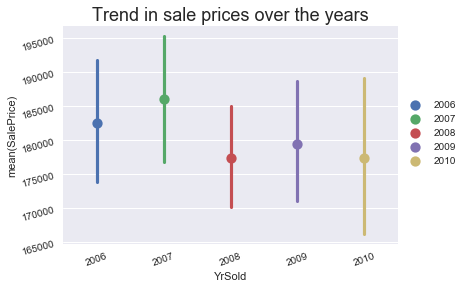

In [34]:
sns.pointplot(x='YrSold', y='SalePrice', hue= 'YrSold', data=train_df)

plt.legend(bbox_to_anchor=(1.2, 0.7))
plt.xticks(rotation=20)
plt.yticks(rotation=15)
plt.title("Trend in sale prices over the years", fontsize=18)

We see that 2010 sold houses at lower prices(in mean terms) 
and that 2007 has the highest prices

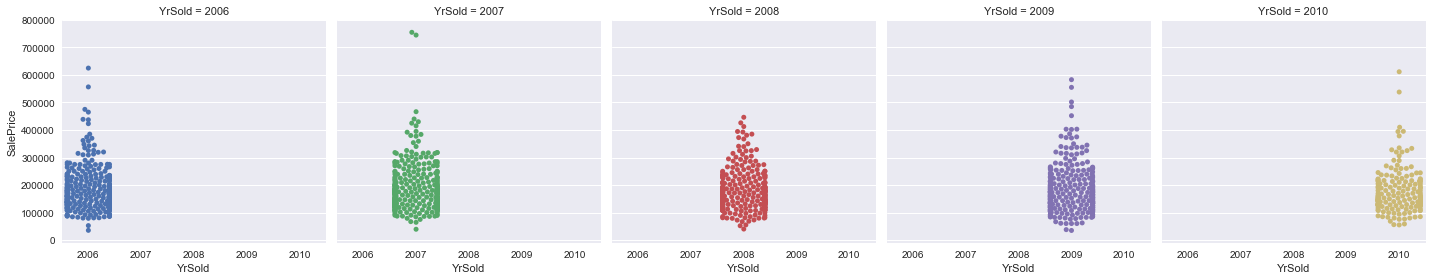

In [35]:
plt.figure(figsize=(8, 6))
sns.factorplot(x='YrSold',
               y='SalePrice', 
               data=train_df, 
               hue='YrSold', 
               col='YrSold', 
               kind='swarm',
               )  


In [36]:
train_df.groupby('TotRmsAbvGrd').size()

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
dtype: int64

In [37]:
# sns.countplot(TotRmsAbvGrd)

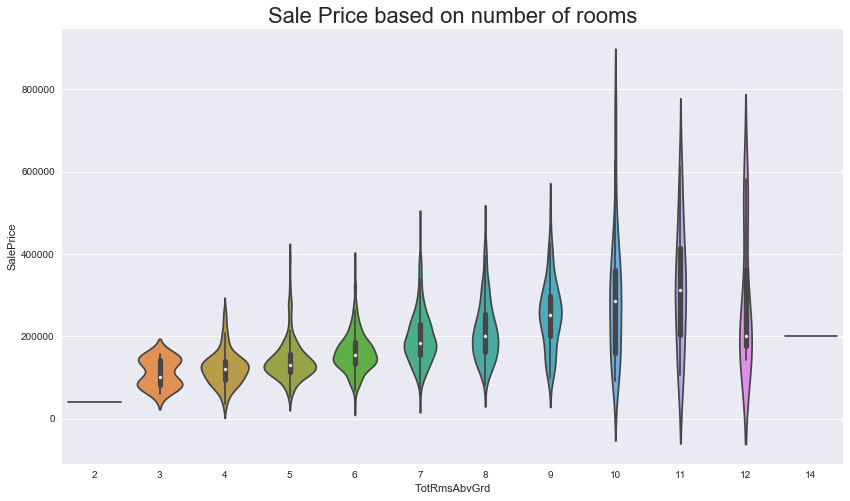

In [38]:
plt.figure(figsize=(14,8))
sns.violinplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

plt.title("Sale Price based on number of rooms", fontsize=22)

We can see that the higher the rooms, the higher the price. <br>
However for 10, 11 & 12 rooms this trend is not really followed and seems unstable

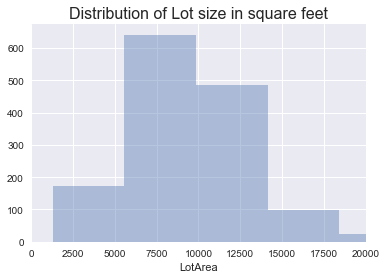

In [39]:
sns.distplot(train_df['LotArea'], kde=False)
plt.xlim(0, 20000)
plt.title("Distribution of Lot size in square feet", fontsize=16)

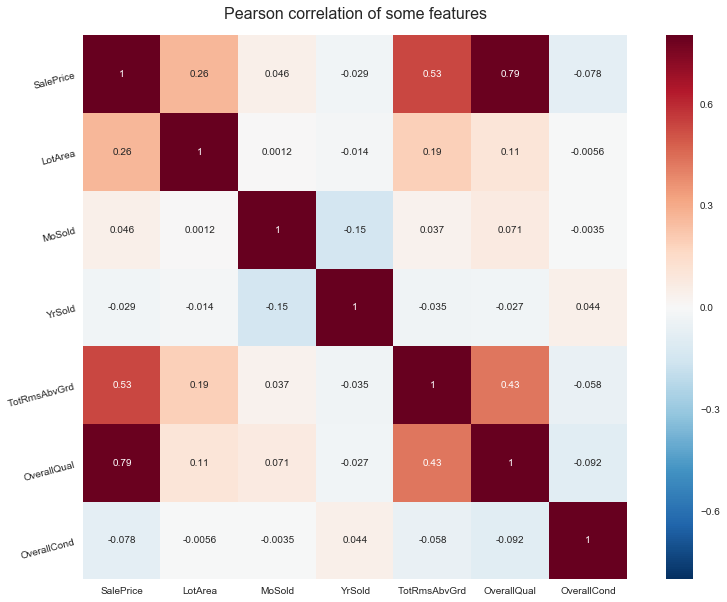

In [40]:
plt.figure(figsize=(14,10))

display = train_df[['SalePrice', 'LotArea', 'MoSold', 'YrSold', 'TotRmsAbvGrd',
                  'OverallQual', 'OverallCond']]
sns.heatmap(display.corr(), annot=True, square=True, vmax=0.8)
plt.yticks(rotation=15)
plt.title("Pearson correlation of some features", y=1.02, size=16)

The Pearson correlation plot tell us how strongly a feature is correlated with one another. <br>
We can observe that the Overall Quality is highly correlated with the Sale Price.<br>
There may be other features like that and we want to avoid that as
this <b> means that there is redundant or superfluous data in our training set and each feature does not always carry unique information </b>

In [61]:
a = train_df.drop('Id', axis=1).corr()
b = a['SalePrice']
(b > 0.5).value_counts()
# columns = train_df.drop('Id', axis=1).columns
# for column in columns:
#     print( (a[column] > 0.6).value_counts ) 
    

False    69
True     11
Name: SalePrice, dtype: int64

<h3 style="text-align:center">Split-out dataset</h3>

In [42]:
# Test options and evaluation metric
num_folds = 10
seed = 46
scoring = 'neg_mean_squared_error'

In [43]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000


In [44]:
array = train_df.values
train_df.shape

X = array[ :, 1:train_df.shape[1] ]
Y = array[:, train_df.shape[1] - 1]

print(X.shape, Y.shape)

test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
                                                   random_state=seed)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1460, 80) (1460,)
(1168, 80) (292, 80) (1168,) (292,)


We will leave more than 1000 rows of our training set to train the algorithms. <br>
The rest will serve to evaluate the algorithms until reaching an acceptable performance.

<h3 style="text-align:center">Evaluation algorithms: Ensemble Methods </h3>

In [45]:
ensembles = []
ensembles.append( ('XGB', XGBRegressor(seed=seed)) )
ensembles.append( ('RF', RandomForestRegressor(random_state=seed)) )
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


XGB: -52641535.484079 (84831772.941985)
RF: -44543475.689230 (81790768.305812)


<h3 style="text-align:center">Feature Importance</h3>

A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

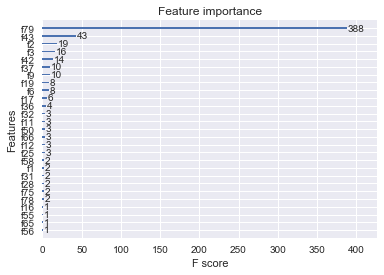

In [46]:
model = XGBRegressor()
model.fit(X_train, Y_train)
# plot feature importance
plot_importance(model)
plt.yticks(rotation=1)
plt.show()


Feature ranking:
1. feature 79 (0.982109)
2. feature 48 (0.006020)
3. feature 33 (0.004445)
4. feature 70 (0.002396)
5. feature 78 (0.001021)
6. feature 23 (0.000737)
7. feature 56 (0.000661)
8. feature 16 (0.000646)
9. feature 11 (0.000568)
10. feature 55 (0.000512)
11. feature 3 (0.000157)
12. feature 76 (0.000136)
13. feature 18 (0.000126)
14. feature 6 (0.000099)
15. feature 69 (0.000054)


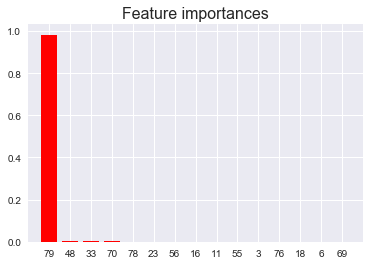

In [47]:
forest = RandomForestRegressor(random_state=seed)
forest.fit(X_train, Y_train)

# print(forest.feature_importances_, forest.feature_importances_.shape)
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # np.argsort returns the indices that would sort an array, [::-1]: end to beginning, counting down by 1
# print(std, std.shape)

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
for f in range(15):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar( range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
# plt.xticks( range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

plt.figure()
plt.title("Feature importances", size=16)
plt.bar( range(15), importances[indices[0:15]], color="r", yerr=std[indices[0:15]], align="center")
plt.xticks( range(15), indices[0:15])
plt.xlim([-1, 15])
plt.show()

The plot suggests that only one feature (79) is highly informative which is the 'SaleType' feature that describes the type of sale

<h3 style="text-align:center">Feature Selection</h3>

Feature importance scores can be used for feature selection in scikit-learn with the <b>SelectFromModel</b> class that takes a model and can transform a dataset into a subset with selected features

In [48]:
# model = XGBRegressor()
# model.fit(X_train, Y_train)

# # model.booster().get_fscore()
# feature_importances_ = model.booster().get_score(importance_type='weight')
# thresholds = sorted( list(feature_importances_.values()), reverse=True )

# for thresh in thresholds:
#     print(thresh)
#     # select features using threshold
#     selection = SelectFromModel(model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(X_train)
#     # train model
#     selection_model = XGBRegressor()
#     selection_model.fit(select_X_train, Y_train)
#     # evaluate model
#     select_X_test = selection.transform(X_test)
#     y_pred = selection_model.predict(select_X_test)
#     root_mean_square = (mean_squared_error(Y_test, y_pred) )**0.5
#     print("Thresh:%.3f, n=%d, Accuracy:%.3f%%" % (thresh, select_X_train.shape[1],
#                                                  root_mean_square) )
    

In [49]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, Y_train)

# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = RandomForestRegressor(random_state=seed)
    selection_model.fit(select_X_train, Y_train)
    # evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    root_mean_square = ( mean_squared_error(Y_test, predictions) )**0.5
    print( "Thresh=%.8f, n=%d, Root Mean Squared Error: %.3f" % (thresh, select_X_train.shape[1], root_mean_square) )


Thresh=0.00000000, n=80, Root Mean Squared Error: 2166.211
Thresh=0.00000000, n=80, Root Mean Squared Error: 2166.211
Thresh=0.00000000, n=80, Root Mean Squared Error: 2166.211
Thresh=0.00000000, n=80, Root Mean Squared Error: 2166.211
Thresh=0.00000000, n=76, Root Mean Squared Error: 3297.612
Thresh=0.00000000, n=75, Root Mean Squared Error: 4119.630
Thresh=0.00000000, n=74, Root Mean Squared Error: 4841.815
Thresh=0.00000000, n=73, Root Mean Squared Error: 5011.590
Thresh=0.00000002, n=72, Root Mean Squared Error: 3737.511
Thresh=0.00000003, n=71, Root Mean Squared Error: 4273.212
Thresh=0.00000003, n=70, Root Mean Squared Error: 3129.216
Thresh=0.00000004, n=69, Root Mean Squared Error: 4378.259
Thresh=0.00000005, n=68, Root Mean Squared Error: 4407.157
Thresh=0.00000007, n=67, Root Mean Squared Error: 4164.936
Thresh=0.00000008, n=66, Root Mean Squared Error: 4384.050
Thresh=0.00000008, n=65, Root Mean Squared Error: 2108.868
Thresh=0.00000010, n=64, Root Mean Squared Error: 803.12

In [50]:
# thresh = 5e-7
# thresh = 0.00000008
thresh = 0.00000847

model = RandomForestRegressor(random_state=seed)
model.fit(X_train, Y_train)
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# evaluate model
select_X_test = selection.transform(X_test)
# test
select_X_test = selection.transform(X_test)


print(select_X_train.shape, select_X_test.shape)

(1168, 27) (292, 27)


<h3 style="text-align:center">Testing the model to (X_test, Y_test) before submission</h3>

In [51]:
model = XGBRegressor()
# fit model on training data
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(X_test)

predictions = mean_squared_error(Y_test, y_pred)**0.5
print(predictions)

4152.43434023


<h3 style="text-align:center">Dimensionality Reduction </h3>

In [52]:
model = RandomForestRegressor(random_state=seed)
model.fit(X_train, Y_train)

selection = SelectFromModel(model, threshold=thresh, prefit=True)  
select_X_train = selection.transform(X_train)

selection_model = RandomForestRegressor(random_state=seed)
selection_model.fit(select_X_train, Y_train)

select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
# rmse = mean_squared_error(Y_test, predictions)**0.5
rmse = r2_score(Y_test, predictions)
print("Root Mean Squared Error: %.10f" % (rmse) )

Root Mean Squared Error: 0.9967926523


<h3 style="text-align:center">Evaluate algorithms : Standardization</h3>

In [53]:
# Standardize the dataset
pipelines = []
pipelines.append( ('ScaledLR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('Linear Regression', LinearRegression())] ) ) )

pipelines.append( ('ScaledLasso', Pipeline( [('Scaler', StandardScaler()), 
                                          ('LASSO', Lasso())] ) ) )

pipelines.append( ('ScaledRidge', Pipeline( [('Scaler', StandardScaler()), 
                                          ('Ridge', Ridge())] ) ) )

pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('ElasticNet', ElasticNet())] ) ) )

pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('ElasticNet', ElasticNet())] ) ) )

pipelines.append( ('ScaledEN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('ElasticNet', ElasticNet())] ) ) )

pipelines.append( ('ScaledKNN', Pipeline( [('Scaler', StandardScaler()), 
                                          ('KNN', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledCART', Pipeline( [('Scaler', StandardScaler()), 
                                          ('CART', DecisionTreeRegressor())] ) ) )

pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('SVR', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledRF', Pipeline( [('Scaler', StandardScaler()), 
                                          ('RF', RandomForestRegressor(random_state=seed))] ) ) )

pipelines.append( ('ScaledSVR', Pipeline( [('Scaler', StandardScaler()), 
                                          ('SVR', KNeighborsRegressor())] ) ) )

pipelines.append( ('ScaledXGB', Pipeline( [('Scaler', StandardScaler()), 
                                          ('XGB', XGBRegressor(seed=seed))] ) ) )

# scoring = 'r2'
scoring = 'neg_mean_squared_error'

results = []
names = []

for name, model in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state= seed)
    cv_results = cross_val_score(model, select_X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.10f (%.10f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    


ScaledLR: -0.0000000000 (0.0000000000)
ScaledLasso: -453.9804859090 (225.6015272418)
ScaledRidge: -37133.3876057677 (34910.8736223116)
ScaledEN: -642995443.2172294855 (376822175.6751164794)
ScaledEN: -642995443.2172294855 (376822175.6751164794)
ScaledEN: -642995443.2172294855 (376822175.6751164794)
ScaledKNN: -1219314209.3889079094 (687226431.2118314505)
ScaledCART: -100133105.7452991456 (192020742.8216478229)
ScaledSVR: -1219314209.3889079094 (687226431.2118314505)
ScaledRF: -45278207.6342413723 (78365159.9329126477)
ScaledSVR: -1219314209.3889079094 (687226431.2118314505)
ScaledXGB: -16671812.1427196860 (25680744.2250395007)


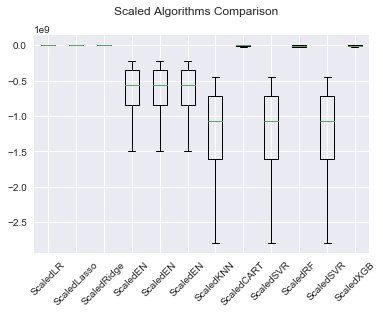

In [54]:
# compare algorithms 
fig = plt.figure()
fig.suptitle('Scaled Algorithms Comparison')
ax = fig.add_subplot(111)
plt.xticks(rotation=45)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h3 style="text-align:center"> Tuning parameters</h3>

In [55]:
scoring = 'neg_mean_squared_error'

scaler = StandardScaler().fit(select_X_train)
rescaledX = scaler.transform(select_X_train)

alpha = [2, 2.5, 3.3, 3.4, 3.5, 3.7]
param_grid = dict(alpha=alpha)
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %.10f using %s" % (grid_result.best_score_, grid_result.best_params_) )

Best: -12.5779579320 using {'alpha': 3.5}


<h3 style="text-align:center">Testing the model to (X_test, Y_test) before submission</h3>


In [56]:
# prepare the model
scaler = StandardScaler().fit(select_X_train)
rescaledX = scaler.transform(select_X_train)
model = Lasso(alpha=3.5)
# fit model on training data
model.fit(rescaledX, Y_train)

# transform the valdation dataset
rescaledValidationX = scaler.transform(select_X_test)
y_pred = model.predict(rescaledValidationX)


predictions = mean_squared_error(Y_test, y_pred)**0.5
# predictions = r2_score(Y_test, y_pred)
print(predictions)
print(y_pred)


3.56797020356
[ 130502.20423722   55998.50067674  249996.91715653  113002.9784959
  142001.69543866  122502.55818405  134502.02726381  249996.91715653
  138001.87241208  115002.8900092   138888.83316822  127002.35908896
  148001.42997854  132002.1378722   149001.38573519  118002.75727914
  112003.02273926  131002.18211555  274995.8110727   177000.1469213
  116502.82364417  386240.88899966  276995.72258599  153338.19385177
  127002.35908896  155001.12027507  167500.56723316  195999.30629759
  130002.2263589   258996.51896635  269786.04158057  194200.38589139
  108003.19971267  127002.35908896  117002.80152249  189999.57175771
   98603.61560019  225997.978997    204998.90810742  267996.12077617
  179600.03188859  169990.45706721  207498.79749903  202499.0187158
  198899.17799187  309994.26255534  177000.1469213   259996.47472299
   39306.23923103  189999.57175771  143751.6180128   128202.30599694
  206998.81962071  188999.61600107  334993.15647151   80004.43852656
  171000.41238142   913

In [57]:
Y_test

array([ 130500.,   55993.,  250000.,  113000.,  142000.,  122500.,
        134500.,  250000.,  138000.,  115000.,  138887.,  127000.,
        148000.,  132000.,  149000.,  118000.,  112000.,  131000.,
        275000.,  177000.,  116500.,  386250.,  277000.,  153337.,
        127000.,  155000.,  167500.,  196000.,  130000.,  259000.,
        269790.,  194201.,  108000.,  127000.,  117000.,  190000.,
         98600.,  226000.,  205000.,  268000.,  179600.,  169990.,
        207500.,  202500.,  198900.,  310000.,  177000.,  260000.,
         39300.,  190000.,  143750.,  128200.,  207000.,  189000.,
        335000.,   80000.,  171000.,   91300.,  145000.,  188700.,
        118000.,  143000.,  115000.,  315000.,  275000.,  171000.,
        257000.,  146000.,  144000.,  244600.,  105000.,  320000.,
        108000.,  132000.,  228000.,  325000.,  309000.,  239000.,
        213250.,  165000.,  226700.,  126000.,  403000.,  160000.,
        104000.,   85000.,  140000.,  133000.,  230000.,  1295